In [1]:
import sys
sys.path.append("..")
import qtx

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)

Populating the interactive namespace from numpy and matplotlib


In [4]:
api = "market-data-eod"

In [5]:
params = { 
    'securityId': 'NSE:7UP',
    'startDate': '2016-11-01',
    'endDate': '2017-03-18'
}

In [6]:
api_key = 'CCSnPZGQES4RkFmZAV4ll3IYEvhscycG1tnBjvh9'

In [7]:
client = qtx.ApiClient()

In [8]:
data = client.get(api_key, api, params).data_frame()

In [9]:
data.head()

,SecurityID,close_value,date,day_high,day_low,open_value,price_change_percent,volume
25,NSE:7UP,77.71,2017-03-17,77.71,77.71,77.71,0.0,6233
24,NSE:7UP,77.71,2017-03-16,86.0,77.71,86.0,-9.64,30734
23,NSE:7UP,86.0,2017-03-15,86.0,86.0,86.0,0.0,15327
22,NSE:7UP,86.0,2017-03-14,86.0,86.0,86.0,0.0,12716
21,NSE:7UP,86.0,2017-03-13,86.0,86.0,86.0,0.0,15366


In [21]:
data['close_value'] = data[['close_value']].apply(pd.to_numeric) #set close_value to numeric

In [22]:
#df['col name']=df.col name .astype(float) #this might also work too

In [10]:
data['date'] = data[['date']].apply(pd.to_datetime) #set date to datetime

In [11]:
#data_test = data.convert_objects(convert_dates=True, convert_numeric=True, convert_timedeltas=True, copy=True) #another method
data_test = data.convert_objects(convert_numeric=True, copy=True) #another method

/Users/broadwayoni/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from IPython.kernel.zmq import kernelapp as app


In [12]:
data_test.dtypes

SecurityID                      object
close_value                    float64
date                    datetime64[ns]
day_high                       float64
day_low                        float64
open_value                     float64
price_change_percent           float64
volume                           int64
dtype: object

In [26]:
#data_test['date'] = data_test[['date']].apply(pd.to_datetime)

In [13]:
data_test.head()

,SecurityID,close_value,date,day_high,day_low,open_value,price_change_percent,volume
25,NSE:7UP,77.71,2017-03-17,77.71,77.71,77.71,0.00,6233
24,NSE:7UP,77.71,2017-03-16,86.00,77.71,86.00,-9.64,30734
23,NSE:7UP,86.00,2017-03-15,86.00,86.00,86.00,0.00,15327
22,NSE:7UP,86.00,2017-03-14,86.00,86.00,86.00,0.00,12716
21,NSE:7UP,86.00,2017-03-13,86.00,86.00,86.00,0.00,15366


In [14]:
data_test2 = data_test.set_index('date')

In [15]:
data_test2.head()

,SecurityID,close_value,day_high,day_low,open_value,price_change_percent,volume
date,,,,,,,
2017-03-17,NSE:7UP,77.71,77.71,77.71,77.71,0.00,6233
2017-03-16,NSE:7UP,77.71,86.00,77.71,86.00,-9.64,30734
2017-03-15,NSE:7UP,86.00,86.00,86.00,86.00,0.00,15327
2017-03-14,NSE:7UP,86.00,86.00,86.00,86.00,0.00,12716
2017-03-13,NSE:7UP,86.00,86.00,86.00,86.00,0.00,15366


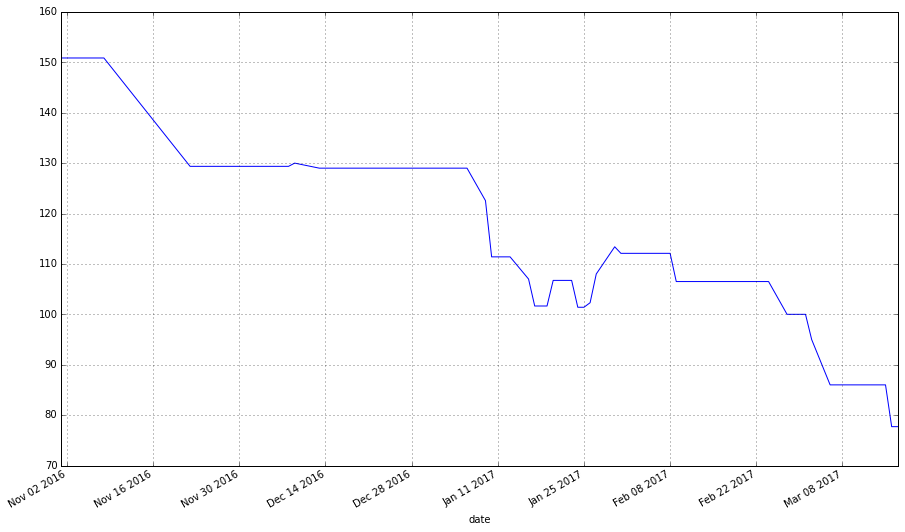

In [16]:
data_test2["close_value"].plot(grid = True)